In [1]:
# Install YOLOv5 dependencies
!pip install -U torch torchvision
!pip install -U pycocotools
!pip install opencv-python-headless matplotlib

# Clone the YOLOv5 repository (this includes the model code)
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install requirements for YOLOv5
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [2]:
# Load the pre-trained YOLOv5 model from the ultralytics repo
import torch

# Load YOLOv5 model (this will automatically download the weights)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Small YOLO model (you can use yolov5m, yolov5l for larger models)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-5-10 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 200MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Saving soilder.jpeg to soilder.jpeg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


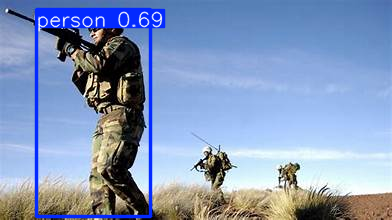

In [3]:
# Import OpenCV and Image libraries
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load an image (upload an image of a soldier, vehicle, or weapon)
from google.colab import files
uploaded = files.upload()

# Read the uploaded image
img = Image.open(next(iter(uploaded)))

# Perform inference using YOLOv5
results = model(img)

# Render results and display
results.show()  # Display image with bounding boxes

In [5]:
# Upload a video file
from google.colab import files
uploaded = files.upload()

import cv2
from IPython.display import display, Image, clear_output
import time
import torch

# Load the YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Get the uploaded video file name
video_path = list(uploaded.keys())[0]

# Open the uploaded video file
cap = cv2.VideoCapture(video_path)

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform inference on the video frame
        results = model(frame)

        # Render results
        results.render()

        # Convert frame to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display in Colab
        _, frame_png = cv2.imencode('.png', frame)
        clear_output(wait=True)  # Clear previous frame
        display(Image(data=frame_png.tobytes()))

        time.sleep(0.1)  # Adjust playback speed

except KeyboardInterrupt:
    pass

finally:
    cap.release()

Saving zRwDMRr134s[1] to zRwDMRr134s[1]


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-10 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [14]:
!pip install librosa

In [6]:
# Detect objects and show alert in Colab
results = model(img)

# Get the detected class names
detected_classes = [results.names[int(cls)] for cls in results.pred[0][:, -1]]

print("Detected Classes:", detected_classes)

# If a weapon is detected, show an alert
if 'weapon' in detected_classes:
    print("🚨 Weapon detected! 🚨")

from IPython.display import Audio, display

# Specify the audio URL and rate
audio_url = 'https://freesound.org/people/tyops/sounds/404260/download/404260__tyops__beep-02.wav'  # Example beep sound
# If the URL points to a collection of tagged sounds, you need to select a single sound file

# Display audio player and auto-play sound
display(Audio(url=audio_url, autoplay=True)) # Play a sound from a URL


Detected Classes: ['person']


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [7]:
# Get detected class IDs from results
detected_class_ids = results.pred[0][:, -1].tolist()

# Get unique class IDs
unique_class_ids = list(set(int(cls_id) for cls_id in detected_class_ids))

# Print detected class names
for cls_id in unique_class_ids:
    print(f"{results.names[cls_id]} detected in the image.")

person detected in the image.


In [8]:
# Filter out and detect only weapons
weapon_detected = [result for result in results.xywh[0] if results.names[int(result[5])] == 'gun']

if weapon_detected:
    print("Weapon detected!")
    play_alert_sound()  # Play an alert sound when a weapon is detected